In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.range(50, dtype=tf.float32)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
      dtype=float32)>

In [4]:
print(tf.newaxis)

None


In [5]:
tf.range(50, dtype=tf.float32)[:, tf.newaxis]

<tf.Tensor: shape=(50, 1), dtype=float32, numpy=
array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.]], dtype=float32)>

In [6]:
tf.range(128, dtype=tf.float32)[tf.newaxis, :]

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127.]], dtype=float32)>

In [7]:
a = np.arange(3).reshape(3,1)
b = np.arange(5).reshape(1,5)
a*b

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

In [8]:
i=tf.range(128, dtype=tf.float32)[tf.newaxis, :]
angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(128, tf.float32))
# print(angles)
print(angles.shape)

position=tf.range(50, dtype=tf.float32)[:, tf.newaxis]
# print(position)
print(position.shape)
angle_rads = angles*position   # (50,1)(1,128) (50,128)
# print(angle_rads)
# print(angle_rads[:, 0::2])
sines = tf.math.sin(angle_rads[:, 0::2])
# print(sines)

cosines = tf.math.cos(angle_rads[:, 1::2])
# print(cosines)

pos_encoding = tf.concat([sines, cosines], axis=-1)
print(pos_encoding[3])
pos_encoding = pos_encoding[tf.newaxis, ...]
print(pos_encoding.shape)

(1, 128)
(50, 1)
tf.Tensor(
[ 1.41120002e-01  5.17305732e-01  7.78272510e-01  9.29644823e-01
  9.93253171e-01  9.93967772e-01  9.53634441e-01  8.89167428e-01
  8.12648892e-01  7.32186019e-01  6.52903974e-01  5.77821970e-01
  5.08536100e-01  4.45719600e-01  3.89470309e-01  3.39546382e-01
  2.95520216e-01  2.56876916e-01  2.23075420e-01  1.93584546e-01
  1.67903304e-01  1.45571157e-01  1.26171768e-01  1.09333232e-01
  9.47260931e-02  8.20602104e-02  7.10812137e-02  6.15667887e-02
  5.33230826e-02  4.61813621e-02  3.99949774e-02  3.46365310e-02
  2.99954992e-02  2.59760078e-02  2.24949289e-02  1.94802172e-02
  1.68694388e-02  1.46085061e-02  1.26505569e-02  1.09550050e-02
  9.48669109e-03  8.21516663e-03  7.11406162e-03  6.16053585e-03
  5.33481315e-03  4.61976323e-03  4.00055340e-03  3.46433907e-03
  2.99999560e-03  2.59789010e-03  2.24968069e-03  1.94814370e-03
  1.68702309e-03  1.46090204e-03  1.26508914e-03  1.09552208e-03
  9.48683242e-04  8.21525755e-04  7.11412111e-04  6.16057427e-

In [9]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])

        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
#         print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

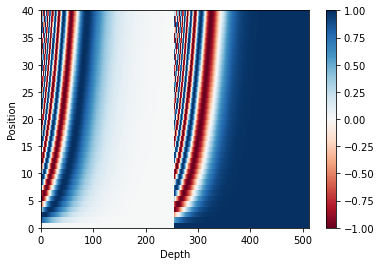

In [10]:
sample_pos_encoding = PositionalEncoding(40, 512)
# print(sample_pos_encoding.pos_encoding[0,10,10])


plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [11]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True)
#     print(matmul_qk)
    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)

    logits = matmul_qk / tf.math.sqrt(depth)
#     print(logits)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
#     print(attention_weights)
    
    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)
#     print(output)
    
    return output, attention_weights

In [15]:
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)

In [13]:
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [14]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [20]:
temp_q = tf.constant([[[[0, 0], [0, 10], [10, 10]],
                       [[0, 0], [0, 10], [10, 10]],
                       [[0, 0], [0, 10], [10, 10]],
                       [[0, 0], [0, 10], [10, 10]]]],dtype=tf.float32)  # (1,4,3,2)
temp_k = tf.constant([[[[0, 0], [0, 10], [10, 10]],
                       [[0, 0], [0, 20], [20, 20]],
                       [[0, 0], [0, 30], [30, 30]],
                       [[0, 0], [0, 40], [40, 40]]]],dtype=tf.float32)  # (1,4,3,2)
temp_v = tf.constant([[[[0, 0], [0, 10], [10, 10]],
                       [[0, 0], [0, 20], [20, 20]],
                       [[0, 0], [0, 30], [30, 30]],
                       [[0, 0], [0, 40], [40, 40]]]],dtype=tf.float32)  # (1,4,3,2)

matmul_qk = tf.matmul(temp_q, temp_k, transpose_b=True)
print(matmul_qk) # (1, 4, 3, 3)
output = tf.matmul(matmul_qk, temp_v)  # (3,3)(3,2)
print(output)
# temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
# print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
# print(temp_out) # 어텐션 값

tf.Tensor(
[[[[  0.   0.   0.]
   [  0. 100. 100.]
   [  0. 100. 200.]]

  [[  0.   0.   0.]
   [  0. 200. 200.]
   [  0. 200. 400.]]

  [[  0.   0.   0.]
   [  0. 300. 300.]
   [  0. 300. 600.]]

  [[  0.   0.   0.]
   [  0. 400. 400.]
   [  0. 400. 800.]]]], shape=(1, 4, 3, 3), dtype=float32)
tf.Tensor(
[[[[    0.     0.]
   [ 1000.  2000.]
   [ 2000.  3000.]]

  [[    0.     0.]
   [ 4000.  8000.]
   [ 8000. 12000.]]

  [[    0.     0.]
   [ 9000. 18000.]
   [18000. 27000.]]

  [[    0.     0.]
   [16000. 32000.]
   [32000. 48000.]]]], shape=(1, 4, 3, 2), dtype=float32)


In [216]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        
        print('MultiHeadAttention.__init__()')
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        print('MultiHeadAttention.call()')
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]
        
        print('batch_size=', batch_size)
        print('query=', query)
        print('key=', batch_size)
        print('value=', value)
        

        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        
        print('before', query) # (1, 40, 128)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        print('after', query)  # (1, 4, 40, 32)

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        #     query         key.T          matmul_qk 
        # (1, 4, 40, 32)(1, 4, 32, 40) = (1, 4, 40, 40)
        #   matmul_qk       value         scaled_attention
        # (1, 4, 40, 40)(1, 4, 40, 32) = (1, 4, 40, 32)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        # (1, 40, 4, 32)

        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))
        # (1, 40, 128)

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)
        # (1, 40, 128)(1, 128, 128)

        return outputs  # (40, 128)

In [217]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [218]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


In [219]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    print('encoder_layer')
    print(inputs)
    
    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    
    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': padding_mask # 패딩 마스크 사용
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    model = tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)
    weights = model.get_weights()
    print('model.get_weights()')
    for i, a in enumerate(weights):
        print(i, a.shape)
    return model

In [220]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
    print('encoder')
    
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    print(inputs)
    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
      outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
          dropout=dropout, name="encoder_layer_{}".format(i),
      )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [221]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)

In [222]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [223]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': look_ahead_mask # 룩어헤드 마스크
        })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
            'mask': padding_mask # 패딩 마스크
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [224]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [225]:
def transformer(vocab_size, num_layers, dff,
                  d_model, num_heads, dropout,
                  name="transformer"):
    print('transformer',vocab_size,num_layers,dff,d_model,num_heads)

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    print(inputs)

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크
#     print('enc_outputs', enc_outputs)

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [226]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

# weights=small_transformer.get_weights()
# for a in weights:
#     print(a.shape)
    
# tf.keras.utils.plot_model(
#     small_transformer, to_file='small_transformer.png', show_shapes=True)

transformer 9000 4 512 128 4
Tensor("inputs_193:0", shape=(None, None), dtype=float32)
encoder
Tensor("inputs_194:0", shape=(None, None), dtype=float32)
encoder_layer
Tensor("inputs_195:0", shape=(None, None, 128), dtype=float32)
MultiHeadAttention.__init__()
MultiHeadAttention.call()
batch_size= Tensor("attention/strided_slice_138:0", shape=(), dtype=int32)
query= Tensor("inputs_195:0", shape=(None, None, 128), dtype=float32)
key= Tensor("attention/strided_slice_138:0", shape=(), dtype=int32)
value= Tensor("inputs_195:0", shape=(None, None, 128), dtype=float32)
before Tensor("attention/dense_1096/BiasAdd:0", shape=(None, None, 128), dtype=float32)
after Tensor("attention/transpose_272:0", shape=(None, 4, None, 32), dtype=float32)
model.get_weights()
0 (128, 128)
1 (128,)
2 (128, 128)
3 (128,)
4 (128, 128)
5 (128,)
6 (128, 128)
7 (128,)
8 (128,)
9 (128,)
10 (128, 512)
11 (512,)
12 (512, 128)
13 (128,)
14 (128,)
15 (128,)
MultiHeadAttention.call()
batch_size= Tensor("encoder_layer_0/att

MultiHeadAttention.__init__()
MultiHeadAttention.call()
batch_size= Tensor("attention_1/strided_slice_136:0", shape=(), dtype=int32)
query= Tensor("inputs_200:0", shape=(None, None, 128), dtype=float32)
key= Tensor("attention_1/strided_slice_136:0", shape=(), dtype=int32)
value= Tensor("inputs_200:0", shape=(None, None, 128), dtype=float32)
before Tensor("attention_1/dense_1120/BiasAdd:0", shape=(None, None, 128), dtype=float32)
after Tensor("attention_1/transpose_272:0", shape=(None, 4, None, 32), dtype=float32)
MultiHeadAttention.__init__()
MultiHeadAttention.call()
batch_size= Tensor("attention_2/strided_slice_136:0", shape=(), dtype=int32)
query= Tensor("layer_normalization_348/batchnorm/add_1:0", shape=(None, None, 128), dtype=float32)
key= Tensor("attention_2/strided_slice_136:0", shape=(), dtype=int32)
value= Tensor("encoder_outputs_86:0", shape=(None, None, 128), dtype=float32)
before Tensor("attention_2/dense_1124/BiasAdd:0", shape=(None, None, 128), dtype=float32)
after Tenso

before Tensor("decoder_layer_3/attention_1/dense_1150/BiasAdd:0", shape=(None, None, 128), dtype=float32)
after Tensor("decoder_layer_3/attention_1/transpose_68:0", shape=(None, 4, None, 32), dtype=float32)
MultiHeadAttention.call()
batch_size= Tensor("decoder_layer_3/attention_2/strided_slice_34:0", shape=(), dtype=int32)
query= Tensor("decoder_layer_3/layer_normalization_357/batchnorm/add_1:0", shape=(None, None, 128), dtype=float32)
key= Tensor("decoder_layer_3/attention_2/strided_slice_34:0", shape=(), dtype=int32)
value= Tensor("encoder_outputs_85:0", shape=(None, None, 128), dtype=float32)
before Tensor("decoder_layer_3/attention_2/dense_1154/BiasAdd:0", shape=(None, None, 128), dtype=float32)
after Tensor("decoder_layer_3/attention_2/transpose_68:0", shape=(None, 4, None, 32), dtype=float32)
MultiHeadAttention.call()
batch_size= Tensor("decoder/decoder_layer_0/attention_1/strided_slice_34:0", shape=(), dtype=int32)
query= Tensor("decoder/dropout_317/cond/Identity:0", shape=(None

In [37]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

NameError: name 'Text' is not defined

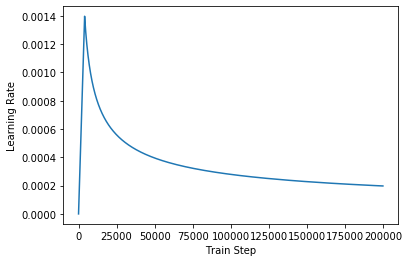

In [38]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
Text(0.5, 0, 'Train Step')